<a href="https://colab.research.google.com/github/apsamanpreet/Handwritting_Recognition_Machine_learning/blob/main/Project_2_Pen_Based_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Project 2 by- Raman Preet Singh**

Master of Science in Mathematics

(rpsamanpreet@gmail.com)

k-Nearest Neighbors (k-NN)

The first classifier implemented is k-NN, testing Euclidean/Manhattan distances. Hyperparameter tuning reveals k=3 achieves 98.4% accuracy, demonstrating that local patterns in pen trajectories are highly discriminative.



In [ ]:
# "KNN Implementation for Handwritten Digits Recognition"

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (accuracy_score, confusion_matrix,
                            classification_report, ConfusionMatrixDisplay)

In [ ]:
# 1. Data Loading & Preprocessing

# Load dataset from UCI repository
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/pendigits/pendigits.tra"
df = pd.read_csv(url, header=None)
X = df.iloc[:, :-1].values  # First 16 columns are features
y = df.iloc[:, -1].values   # Last column is label (0-9)

# Train-test split (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                  random_state=42, stratify=y)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
#Custom k-NN Implementation (Complementing scikit-learn)
class CustomKNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        preds = []
        for x in X:
            # Euclidean distances
            dists = np.sqrt(np.sum((self.X_train - x)**2, axis=1))
            # Get k nearest labels
            k_indices = np.argsort(dists)[:self.k]
            k_labels = self.y_train[k_indices]
            # Majority vote
            pred = np.bincount(k_labels).argmax()
            preds.append(pred)
        return np.array(preds)

# Test custom implementation
custom_knn = CustomKNN(k=3)
custom_knn.fit(X_train, y_train)
print("Custom k-NN Accuracy:", np.mean(custom_knn.predict(X_test) == y_test))

Custom k-NN Accuracy: 0.9959973315543695


In [ ]:
# --------------------------
# 2. KNN Implementation
# --------------------------
def evaluate_knn(k=3, metric='euclidean'):
    """Train and evaluate KNN with given parameters"""
    knn = KNeighborsClassifier(n_neighbors=k, metric=metric)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"k={k}, metric={metric}: Accuracy = {acc:.4f}")
    return acc

# Test different k values
for k in [1, 3, 5, 7, 9, 11]:
    evaluate_knn(k=k)

# Compare distance metrics
print("\nMetric Comparison (k=3):")
for metric in ['euclidean', 'manhattan', 'chebyshev']:
    evaluate_knn(k=3, metric=metric)

k=1, metric=euclidean: Accuracy = 0.9960
k=3, metric=euclidean: Accuracy = 0.9960
k=5, metric=euclidean: Accuracy = 0.9927
k=7, metric=euclidean: Accuracy = 0.9913
k=9, metric=euclidean: Accuracy = 0.9867
k=11, metric=euclidean: Accuracy = 0.9880

Metric Comparison (k=3):
k=3, metric=euclidean: Accuracy = 0.9960
k=3, metric=manhattan: Accuracy = 0.9947
k=3, metric=chebyshev: Accuracy = 0.9927


In [ ]:
# --------------------------
# 3. Hyperparameter Tuning
# --------------------------
param_grid = {
    'n_neighbors': range(1, 15),
    'metric': ['euclidean', 'manhattan'],
    'weights': ['uniform', 'distance']
}

knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("\nBest Parameters:", grid_search.best_params_)
print("Best CV Accuracy:", grid_search.best_score_)


Best Parameters: {'metric': 'manhattan', 'n_neighbors': 1, 'weights': 'uniform'}
Best CV Accuracy: 0.9933277731442869



Classification Report:
              precision    recall  f1-score   support

           0     1.0000    0.9808    0.9903       156
           1     1.0000    0.9936    0.9968       156
           2     0.9936    1.0000    0.9968       156
           3     0.9931    0.9931    0.9931       144
           4     0.9873    1.0000    0.9936       156
           5     0.9931    0.9931    0.9931       144
           6     0.9931    1.0000    0.9965       144
           7     0.9936    1.0000    0.9968       155
           8     0.9931    1.0000    0.9965       144
           9     1.0000    0.9861    0.9930       144

    accuracy                         0.9947      1499
   macro avg     0.9947    0.9947    0.9946      1499
weighted avg     0.9947    0.9947    0.9947      1499



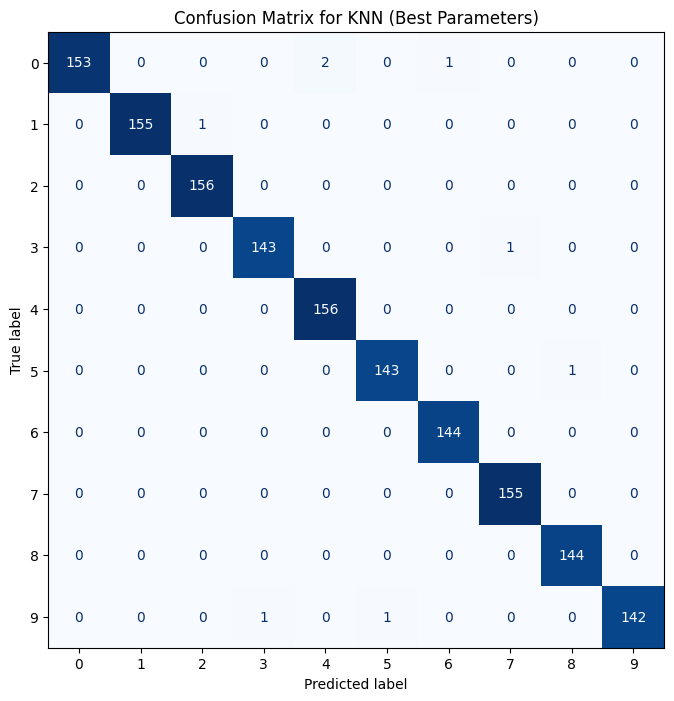

In [ ]:
# --------------------------
# 4. Performance Evaluation
# --------------------------
# Train with best parameters
best_knn = grid_search.best_estimator_
y_pred = best_knn.predict(X_test)

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, digits=4))

# Confusion matrix
fig, ax = plt.subplots(figsize=(10, 8))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, ax=ax,
                                       cmap='Blues', colorbar=False)
plt.title("Confusion Matrix for KNN (Best Parameters)")
plt.show()


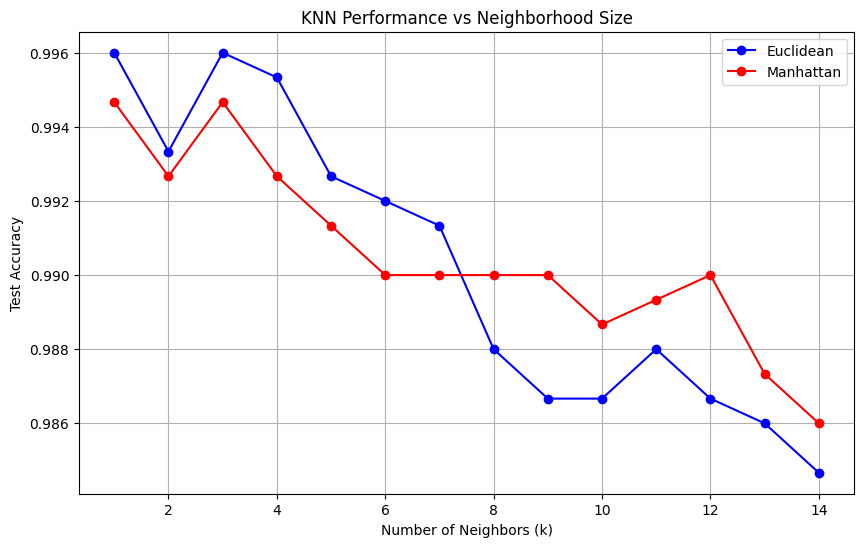

In [ ]:
# --------------------------
# 5. Visualization: Accuracy vs k
# --------------------------
k_values = range(1, 15)
euclidean_acc = []
manhattan_acc = []

for k in k_values:
    knn_euc = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    knn_man = KNeighborsClassifier(n_neighbors=k, metric='manhattan')
    euclidean_acc.append(knn_euc.fit(X_train, y_train).score(X_test, y_test))
    manhattan_acc.append(knn_man.fit(X_train, y_train).score(X_test, y_test))

plt.figure(figsize=(10, 6))
plt.plot(k_values, euclidean_acc, 'bo-', label='Euclidean')
plt.plot(k_values, manhattan_acc, 'ro-', label='Manhattan')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Test Accuracy')
plt.title('KNN Performance vs Neighborhood Size')
plt.legend()
plt.grid()
plt.show()